# Лабораторная работая №5
## Изучение метрик классификации при решении задач бинарной классификации
### Гончаров Ян

#### Часть 1.
Основываясь на модели полученной в лабораторной работе №4 (классификация датасета пассажиров Титаника) дополнить блокнот следующими метриками:
•	Precision
•	Recall
•	F1
•	Отрисовать тепловую карту матрицы ошибок
•	Отрисовать кривую РR
•	Отрисовать кривую ROC
Сделать вывод о качестве полученной модели

#### Часть 2.
Решить задачу классификации того же датасета, используя модели опорных векторов и ближайших соседей.  Для каждой модели вывести метрики аналогично части 1 и сделать вывод о наилучшей из 3 рассмотренных моделей.


#### Ещё раз загрузим наш датасет

In [4]:
import pandas as pd

data = pd.read_csv("Titanic.csv")

data.drop(labels = ['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace= True)
data = data.dropna()

data['Sex'] = data['Sex'].replace(['male', 'female'], [0, 1])
data['Embarked'] = data['Embarked'].replace(['C', 'Q', 'S'], [0, 1, 2])

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = data.drop(labels='Survived', axis = 1)
y = data['Survived']

# Разобьём полученные данные на обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Решим задачу классификации методом логистической регрессии
clf = LogisticRegression(random_state=0, max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)

res = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(res)

# Выведем оценки полученной модели
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Precision score:", precision_score(y_test, y_pred))
print("Recall score:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))

     Actual  Predicted
423       0          0
178       0          0
305       1          1
292       0          0
592       0          0
..      ...        ...
267       1          0
503       0          0
100       0          1
268       1          1
624       0          0

[178 rows x 2 columns]
Accuracy score: 0.7921348314606742
Precision score: 0.7846153846153846
Recall score: 0.6891891891891891
F1 score: 0.7338129496402878


Accuracy score
Оценка точности является пропорцией правильных предсказаний (True positive + True negative) к неверным

Precision score
Точность предсказания верных записей ( TP к TP + FP ). Насколько точно модель отбирает истинные значения

Recall score
Полнота выборки из верных записей ( TP к TP + FN ). Насколько полно модель отбирает истинные значения

F1 score
Гармоническое среднее между Precision и Recall ( 2 * ( Precision * Recall ) / ( Precision + Recall )


У нас относительно неплохие оценки для нашей модели

### Отрисуем тепловую карту

    0   1
0  77  27
1  35  39


<AxesSubplot: >

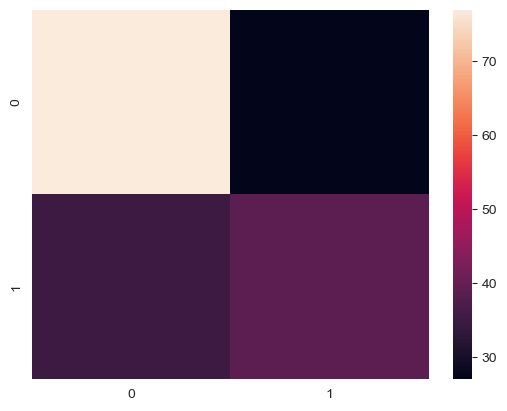

In [50]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm)
print(cm)
sns.heatmap(cm)


Из неё можем увидеть, что ошибки второго рода превалируют над ошибками первого

#### PR - кривая

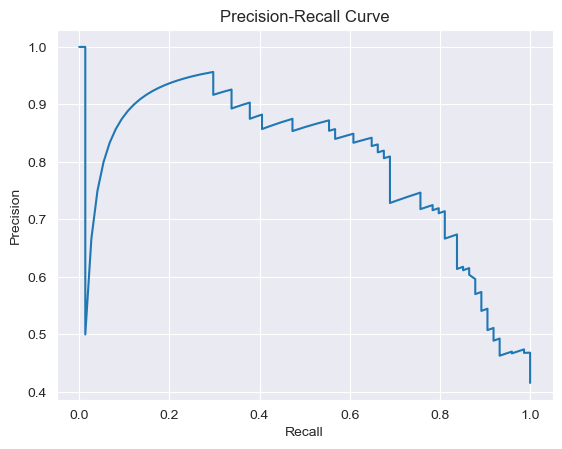

In [20]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_proba[:,1])

fig, ax = plt.subplots()
ax.plot(recall, precision)

ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

plt.show()

Откуда видим зависимость точности нашей модели от полноты её выборки. Можно заметить, что при нулевой выборке точность равняется 1/2, то есть простое угадывание

#### ROC - кривая

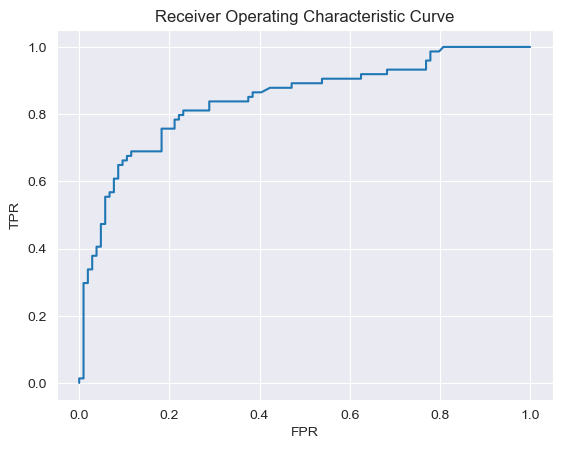

In [26]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_proba[:,1])

plt.plot(fpr, tpr)
plt.title("Receiver Operating Characteristic Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

Можем видеть как меняется вероятность ложной классификации при увеличении чувствительности

#### Вывод о качестве модели
Достойно, но не идеально

### Часть 2

In [42]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

arr = []

clf = SVC(probability=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)

arr.append(["SVC", y_test, y_pred, y_proba])

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)

arr.append(["KNeighbors", y_test, y_pred, y_proba])

for data in arr:
    print("\n", data[0])
    print("Accuracy score:", accuracy_score(y_test, y_pred))
    print("Precision score:", precision_score(y_test, y_pred))
    print("Recall score:", recall_score(y_test, y_pred))
    print("F1 score:", f1_score(y_test, y_pred))


 SVC
Accuracy score: 0.651685393258427
Precision score: 0.5909090909090909
Recall score: 0.527027027027027
F1 score: 0.5571428571428572

 KNeighbors
Accuracy score: 0.651685393258427
Precision score: 0.5909090909090909
Recall score: 0.527027027027027
F1 score: 0.5571428571428572


In [44]:
for data in arr:
    print("\n", data[0])
    cm = confusion_matrix(data[1], data[2])
    cm = pd.DataFrame(cm)
    print(cm)


 SVC
    0   1
0  94  10
1  52  22

 KNeighbors
    0   1
0  77  27
1  35  39


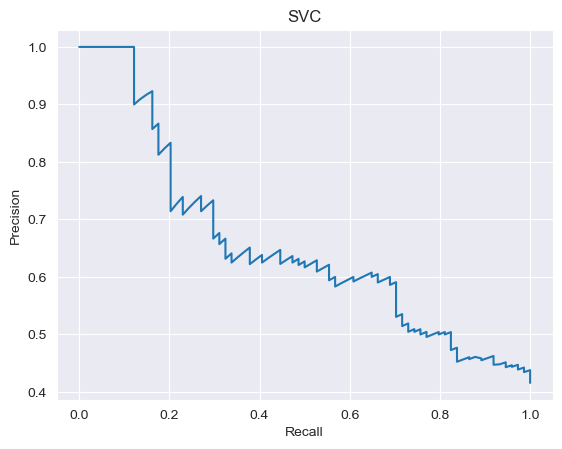

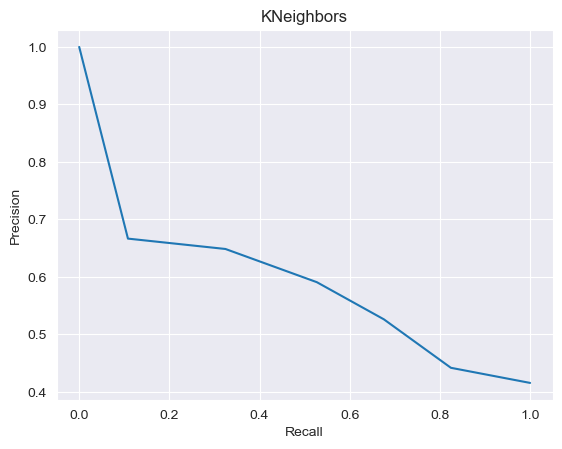

In [48]:
for data in arr:
    precision, recall, thresholds = precision_recall_curve(data[1], data[3][:,1])

    fig, ax = plt.subplots()
    ax.plot(recall, precision)

    ax.set_title(data[0])
    ax.set_ylabel('Precision')
    ax.set_xlabel('Recall')

plt.show()

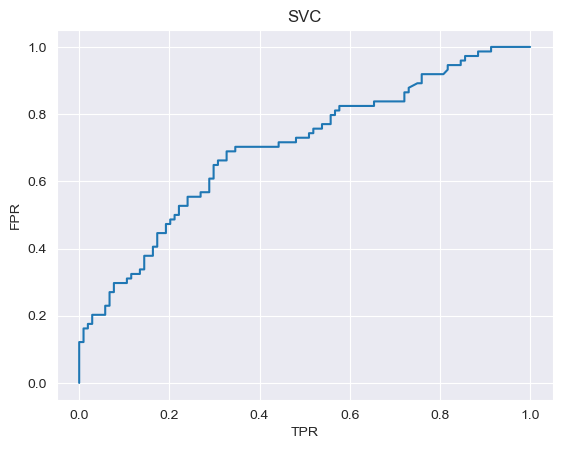

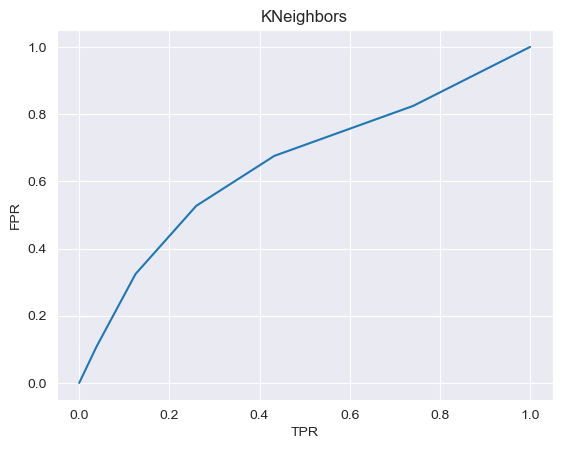

In [49]:
for data in arr:
    fpr, tpr, thresholds = roc_curve(data[1], data[3][:,1])

    fig, ax = plt.subplots()
    ax.plot(fpr, tpr)

    ax.set_title(data[0])
    ax.set_ylabel('FPR')
    ax.set_xlabel('TPR')

plt.show()

### Вывод
##### Метрики

LR
Accuracy score: 0.7921348314606742
Precision score: 0.7846153846153846
Recall score: 0.6891891891891891
F1 score: 0.7338129496402878

SVC
Accuracy score: 0.651685393258427
Precision score: 0.5909090909090909
Recall score: 0.527027027027027
F1 score: 0.5571428571428572

KNeighbors
Accuracy score: 0.651685393258427
Precision score: 0.5909090909090909
Recall score: 0.527027027027027
F1 score: 0.5571428571428572

Обе модели показали результат значительно слабее, чем логистическая регрессия по каждой из метрик
##### Ошибки

 LR
    0   1
0  77  27
1  35  39

 SVC
    0   1
0  94  10
1  52  22

 KNeighbors
    0   1
0  77  27
1  35  39

Метод ближайших соседей показал такой же результат, как и регрессия. Метод опорных векторов имеет существенно бОльшую ошибку 2-го рода, компенсируя её ошибкой 1-го рода
##### PR и ROC кривые

PR и ROC кривые так же существенно ухудшаются в сравнении с логистической регрессией

Можно сделать вывод, что логистическая регрессия является лучшей моделью для наших данных
